# Business cycles across countries


In [1]:
import numpy as np
import eurostat
import matplotlib.pyplot as plt
import pandas as pd
import fredapi
import statsmodels.api as sm

CB =  ['#000000','#004488','#BB5566','#DDAA33', 'purple']
LS = ['solid', 'dashed', ':', '-.']


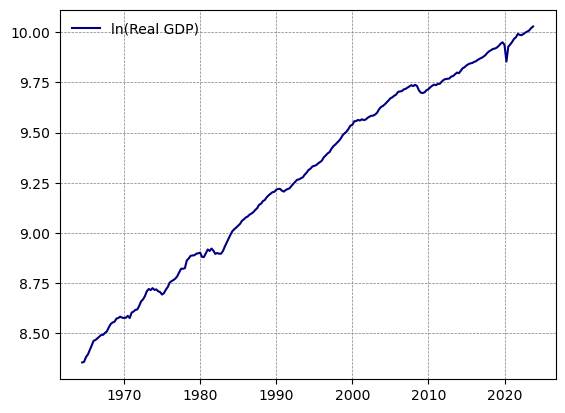

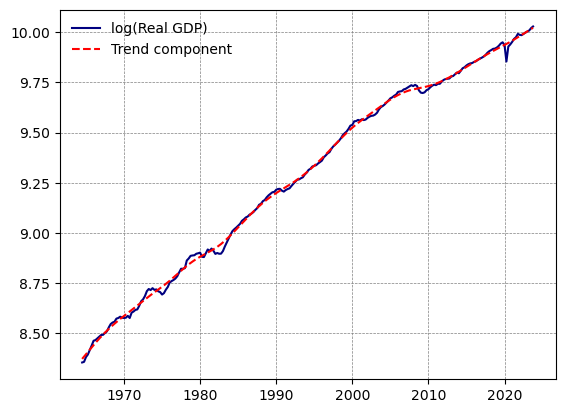

C:\Users\qwp970\AppData\Local\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1600: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)


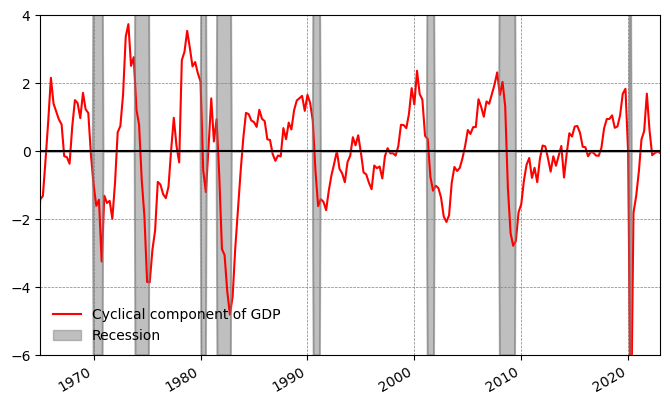

In [4]:
from fredapi import Fred #need to install this
fred = Fred(api_key='c0a963cd5bd17449f6d4b6a4e8d18f14')
mult = 6

## US Business cyles
us_gdp = fred.get_series('f') #gdp
us_rec = fred.get_series('USREC')*mult #recession indicator
tmprec = us_rec*-1 #recession indicator

us_gdp_df = np.log(us_gdp[70:])

## HP Filter
cycle, trend = sm.tsa.filters.hpfilter(us_gdp_df, lamb=1600)
cycle = cycle*100

##Plot of just real GDP
plt.plot(us_gdp_df,color="navy", label = 'ln(Real GDP)')
plt.legend(frameon=False)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.savefig('us_bc1.pdf')
plt.show()

## GDP and trend component
plt.plot(us_gdp_df,color="navy", label = 'log(Real GDP)')
plt.plot(trend,color="red", linestyle = 'dashed', label = 'Trend component')
plt.legend(frameon=False)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.savefig('us_bc2.pdf')
plt.show()

## Just the cycle component
fig, ax = plt.subplots()
plt.plot(cycle,color="red", label = 'Cyclical component of GDP')
us_rec.plot.area(ax=ax, figsize=(8, 5), x='DATE', alpha=0.5, color="gray", label = 'Recession')
tmprec.plot.area(ax=ax, figsize=(8, 5), x='DATE', alpha=0.5, color="gray")
plt.legend(frameon=False,loc ='lower left')
plt.axhline(0, color = 'black')
ax.set_xlim("1965-01-01", "2023-01-01")
ax.set_ylim(-6,4)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.savefig('us_bc3.pdf')
plt.show()


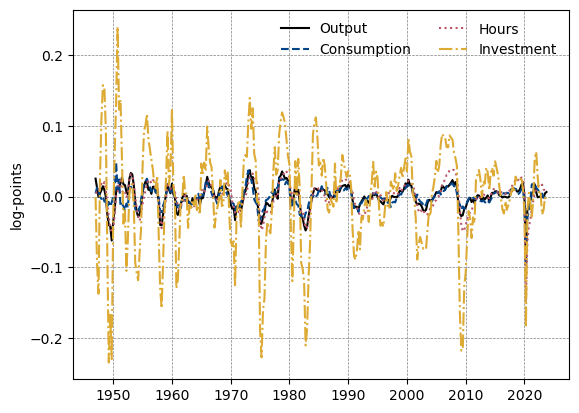

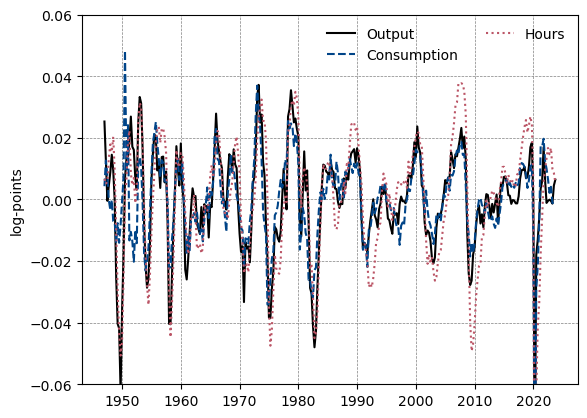

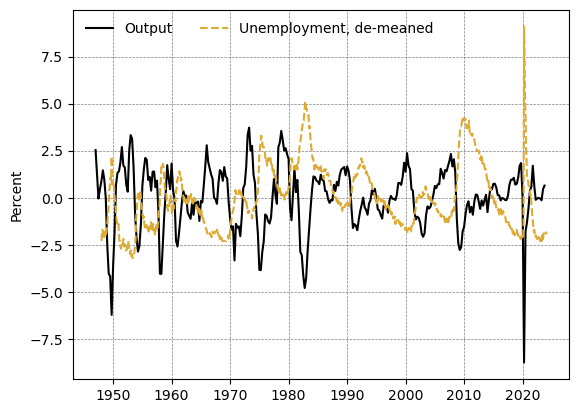

$\sigma_h/\sigma_y$:  1.288248506984418
$\sigma_c/\sigma_y$:  0.8381003793423947
$\sigma_i/\sigma_y$:  4.36639664718179
[[0.         0.         0.         0.         0.        ]
 [0.         1.63842026 0.         0.         0.        ]
 [0.         1.37316064 0.         0.         0.        ]
 [0.         1.63842026 0.         0.         0.        ]
 [0.         2.11069245 0.         0.         0.        ]]


In [47]:
## Other aggregates
## US Business cyles
us_i = fred.get_series('GPDIC1') #Investment
us_c = fred.get_series('PCECC96') #Consumption
us_h = fred.get_series('HOANBS') #Hours
us_y = fred.get_series('GDPC1') #gdp
us_u = fred.get_series('UNRATE') #gdp

## HP Filter
## HP Filter
cycle_i, _ = sm.tsa.filters.hpfilter(np.log(us_i), lamb=1600)
cycle_c, _ = sm.tsa.filters.hpfilter(np.log(us_c), lamb=1600)
cycle_h, _ = sm.tsa.filters.hpfilter(np.log(us_h), lamb=1600)
cycle_y, _ = sm.tsa.filters.hpfilter(np.log(us_y), lamb=1600)

plt.plot(cycle_y, color = CB[0], linestyle = LS[0], label= 'Output')
plt.plot(cycle_c, color = CB[1], linestyle = LS[1], label= 'Consumption')
plt.plot(cycle_h, color = CB[2], linestyle = LS[2], label= 'Hours')
plt.plot(cycle_i, color = CB[3], linestyle = LS[3], label= 'Investment')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.ylabel('log-points')
plt.legend(ncol =2, frameon = False)
plt.savefig('bc_data.pdf')
plt.show()

plt.plot(cycle_y, color = CB[0], linestyle = LS[0], label= 'Output')
plt.plot(cycle_c, color = CB[1], linestyle = LS[1], label= 'Consumption')
plt.plot(cycle_h, color = CB[2], linestyle = LS[2], label= 'Hours')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.ylabel('log-points')
plt.ylim(-0.06,.06)
plt.legend(ncol =2, frameon = False)
plt.savefig('bc_data_noi.pdf')
plt.show()

plt.plot(cycle_y*100, color = CB[0], linestyle = LS[0], label= 'Output')
plt.plot(us_u-np.mean(us_u), color = CB[3], linestyle = LS[1], label= 'Unemployment, de-meaned')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend(ncol =2, frameon = False)
plt.ylabel('Percent')
plt.savefig('bc_data_u.pdf')
plt.show()

print(r'$\sigma_h/\sigma_y$: ', np.sqrt(np.var(cycle_h))/np.sqrt(np.var(cycle_y)))
print(r'$\sigma_c/\sigma_y$: ', np.sqrt(np.var(cycle_c))/np.sqrt(np.var(cycle_y)))
print(r'$\sigma_i/\sigma_y$: ', np.sqrt(np.var(cycle_i))/np.sqrt(np.var(cycle_y)))
#print(r'$\sigma_y$: ', np.sqrt(np.var(cycle_y*100)))


In [67]:
import statsmodels.api as sm

#calculate autocorrelations
## Table
T = np.zeros((4,4))

## Volatility
T[0,0] = np.sqrt(np.var(cycle_y))*100
T[1,0] = np.sqrt(np.var(cycle_c))*100
T[2,0] = np.sqrt(np.var(cycle_i))*100
T[3,0] = np.sqrt(np.var(cycle_h))*100
## Relative volatility
T[0,1] = 1.0
T[1,1] = np.sqrt(np.var(cycle_c))/np.sqrt(np.var(cycle_y))
T[2,1] = np.sqrt(np.var(cycle_i))/np.sqrt(np.var(cycle_y))
T[3,1] = np.sqrt(np.var(cycle_h))/np.sqrt(np.var(cycle_y))
## Autocorrelation
T[0,2] = sm.tsa.acf(cycle_y)[1]
T[1,2] = sm.tsa.acf(cycle_c)[1]
T[2,2] = sm.tsa.acf(cycle_i)[1]
T[3,2] = sm.tsa.acf(cycle_h)[1]
## Correlation with output
T[0,3] = cycle_y.corr(cycle_y)
T[1,3] = cycle_y.corr(cycle_c)
T[2,3] = cycle_y.corr(cycle_i)
T[3,3] = cycle_y.corr(cycle_h)
Table = pd.DataFrame(T)
Table.index = [ r'$Y$', r'$C$', r'$I$', r'$H$']
Table.columns = [ r'$\sigma(x_t)$', r'$\sigma(x_t)/\sigma(Y_t)$', r'$\rho(x_t,x_{t-1})$', r'$\rho(x_t,Y_t)$']
print(Table.to_latex(float_format="%.2f"))



\begin{tabular}{lrrrr}
\toprule
 & $\sigma(x_t)$ & $\sigma(x_t)/\sigma(Y_t)$ & $\rho(x_t,x_{t-1})$ & $\rho(x_t,Y_t)$ \\
\midrule
$Y$ & 1.64 & 1.00 & 0.78 & 1.00 \\
$C$ & 1.37 & 0.84 & 0.71 & 0.79 \\
$I$ & 7.15 & 4.37 & 0.78 & 0.82 \\
$H$ & 2.11 & 1.29 & 0.81 & 0.86 \\
\bottomrule
\end{tabular}



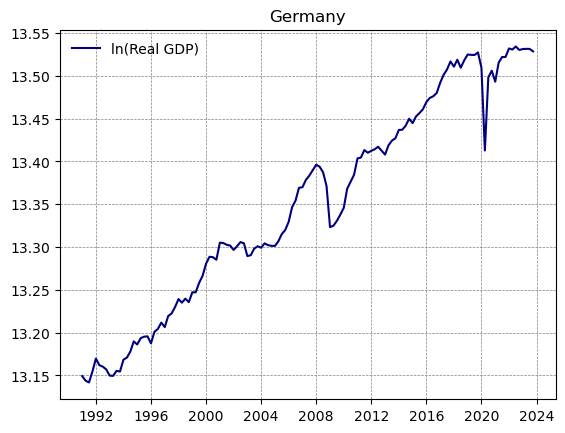

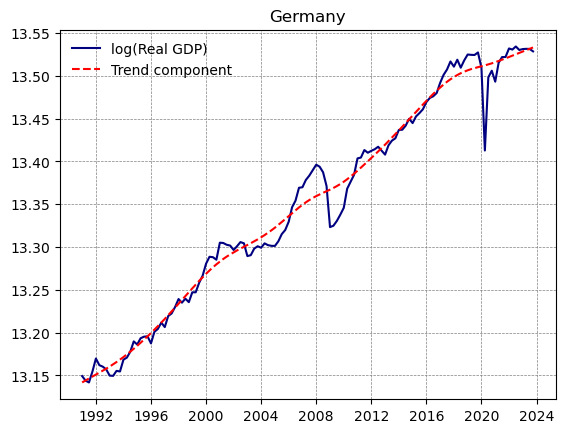

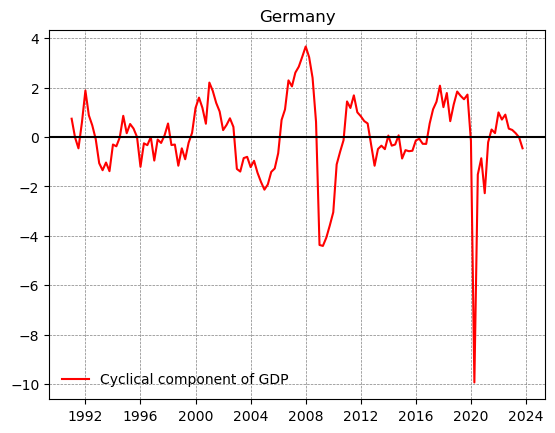

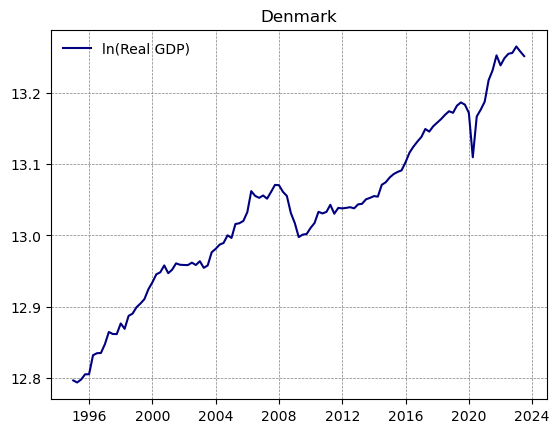

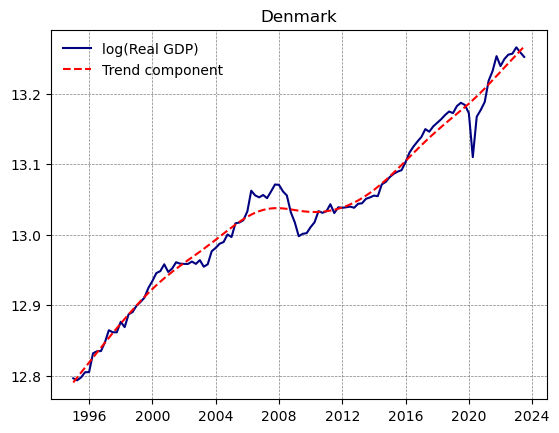

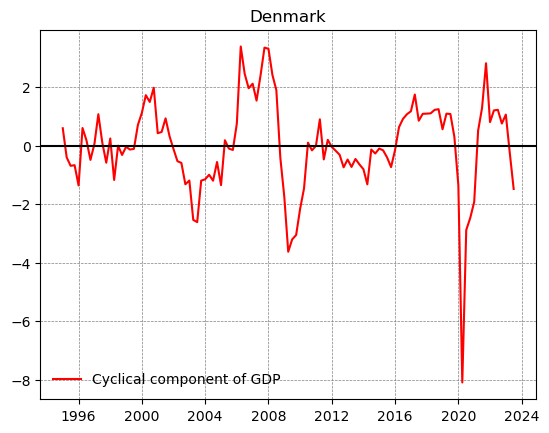

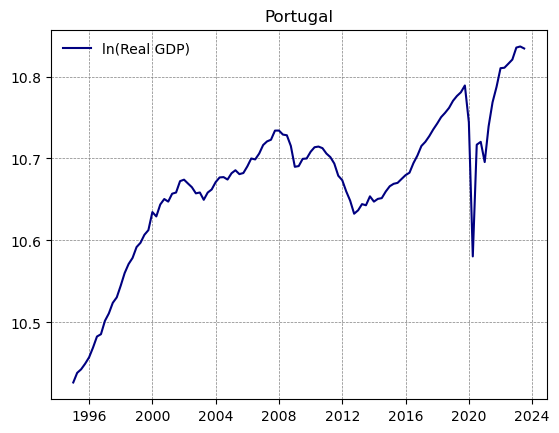

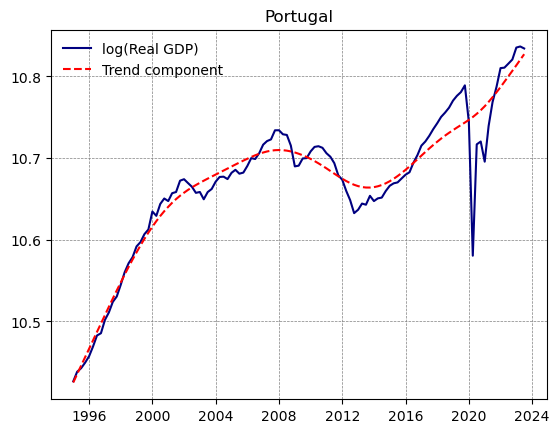

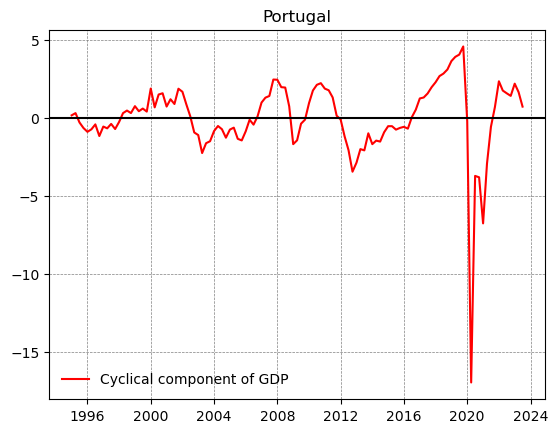

In [109]:
## Business cycles for Denmark
def eurobc(ci, series, countryname):
    ck_gdp = fred.get_series(series) #gdp
    ck_gdp = np.log(ck_gdp)
    
    ## HP Filter
    cycle, trend = sm.tsa.filters.hpfilter(ck_gdp, lamb=1600)
    cycle = cycle*100
    
    ##Plot of just real GDP
    plt.plot(ck_gdp,color="navy", label = 'ln(Real GDP)')
    plt.legend(frameon=False)
    plt.title(countryname)
    plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
    filename = ci + '_bc1.pdf'
    plt.savefig(filename)
    plt.show()
    
    ## GDP and trend component
    plt.plot(ck_gdp,color="navy", label = 'log(Real GDP)')
    plt.plot(trend,color="red", linestyle = 'dashed', label = 'Trend component')
    plt.legend(frameon=False)
    plt.title(countryname)
    plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
    filename = ci + '_bc2.pdf'
    plt.savefig(filename)   
    plt.show()
    
    ## Just the cycle component
    plt.plot(cycle,color="red", label = 'Cyclical component of GDP')
    plt.legend(frameon=False,loc ='lower left')
    plt.axhline(0, color = 'black')
    ax.set_xlim("1965-01-01", "2023-01-01")
    ax.set_ylim(-6,4)
    plt.title(countryname)
    plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
    filename = ci + '_bc3.pdf'
    plt.savefig(filename)    
    plt.show()


eurobc('de', 'CLVMNACSCAB1GQDE','Germany')
eurobc('dk', 'CLVMNACSCAB1GQDK','Denmark')
eurobc('pt', 'CLVMNACSCAB1GQPT','Portugal')

In [21]:
## For assignment:
sd_c =  np.sqrt(np.var(cycle_c))
eps = np.sqrt(12)/2*sd_c
sig = 2
expv = 0.5*((1+eps)**(1-sig)+(1-eps)**(1-sig))
print(expv)
rhs = expv**(1/(1-sig))
print(1/rhs-1)

## Worse?
expv1 = 0.95*(1+0.02)**(1-sig)+0.05*(0.62)**(1-sig)
print(expv1)
rhs1 = expv1**(1/(1-sig))
print(1/rhs1-1)


1.0005659912066998
0.0005659912066997563
1.0120177103099304
0.012017710309930374


1947-01-01         NaN
1947-02-01         NaN
1947-03-01         NaN
1947-04-01         NaN
1947-05-01    2.164487
                ...   
2023-10-01    1.153833
2023-11-01    1.108634
2023-12-01    0.830995
2024-01-01    0.777023
2024-02-01    1.139064
Length: 926, dtype: float64


C:\Users\qwp970\AppData\Local\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1600: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)
C:\Users\qwp970\AppData\Local\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1600: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)


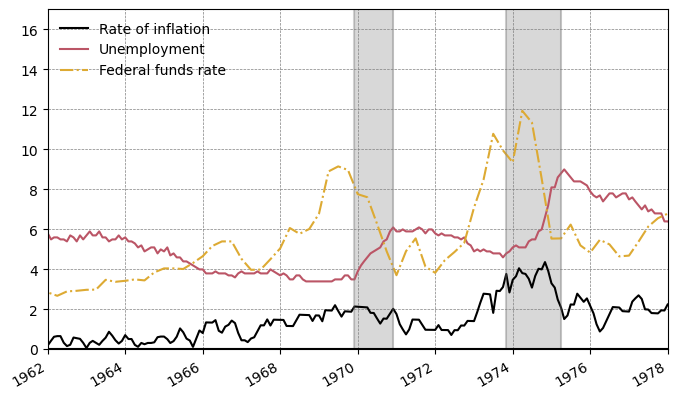

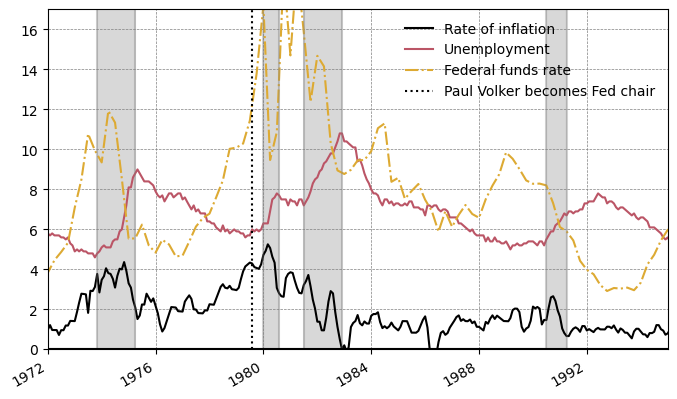

In [44]:
## Volker disinflation
us_u
us_p = np.log(fred.get_series('CPIAUCSL')) #pi
us_ff = fred.get_series('BOGZ1FL072052006Q') #federal funds rate
us_rec = us_rec *3
tmprec = tmprec*3
us_pi = us_p.diff(4)*100
print(us_pi)

## Pre-Volker period
fig, ax = plt.subplots()
plt.plot(us_pi,color=CB[0], label = 'Rate of inflation')
plt.plot(us_u,color=CB[2], label = 'Unemployment')
plt.plot(us_ff,color=CB[3], linestyle = LS[3], label = 'Federal funds rate')
us_rec.plot.area(ax=ax, figsize=(8, 5), x='DATE', alpha=0.3, color="gray")
tmprec.plot.area(ax=ax, figsize=(8, 5), x='DATE', alpha=0.3, color="gray")
plt.legend(frameon=False,loc ='upper left')
plt.axhline(0, color = 'black')
ax.set_xlim("1962-01-01", "1978-01-01")
#ax.vlines("1979-08-06", ymin = 0, ymax = 14)
ax.set_ylim(0,17)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.savefig('pre_volker.pdf')

## Post-Volker period
fig, ax = plt.subplots()
plt.plot(us_pi,color=CB[0], label = 'Rate of inflation')
plt.plot(us_u,color=CB[2], label = 'Unemployment')
plt.plot(us_ff,color=CB[3], linestyle = LS[3], label = 'Federal funds rate')
us_rec.plot.area(ax=ax, figsize=(8, 5), x='DATE', alpha=0.3, color="gray")
tmprec.plot.area(ax=ax, figsize=(8, 5), x='DATE', alpha=0.3, color="gray")
plt.axhline(0, color = 'black')
ax.set_xlim("1972-01-01", "1995-01-01")
ax.vlines("1979-08-06", ymin = 0, ymax = 20, color = 'black',linestyle = LS[2], label = 'Paul Volker becomes Fed chair')
ax.set_ylim(0,17)
plt.legend(frameon=False,loc ='upper right')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.savefig('post_volker.pdf')